In [1]:
import csv
import matplotlib.pyplot as plt
import numpy as np 

In [2]:
data_file = 'data.csv'
nb_max = 12

In [3]:
delimiter='#'
fct_values = set()
n_values = set()
means = {}
stds = {}
with open('data.csv','r') as csvfile:
	spamreader = csv.reader(csvfile, delimiter=delimiter)
	for row in spamreader:
			if len(row) < 4:
				continue
			fct = str(row[0])
			fct_values.add(fct)
			n = int(row[1])
			n_values.add(n)
			if fct not in means:
				means[fct] = {}
				stds[fct] = {}
			if n not in means[fct]:
				means[fct][n] = []
				stds[fct][n] = []
			for i in range(nb_max+2):
				means[fct][n].append(float(row[2+2*i]))
				stds[fct][n].append(float(row[2+2*i+1]))

In [4]:
print("there are "+str(len(fct_values))+" function run on "+str(len(n_values))+" data size")

there are 11 function run on 4 data size


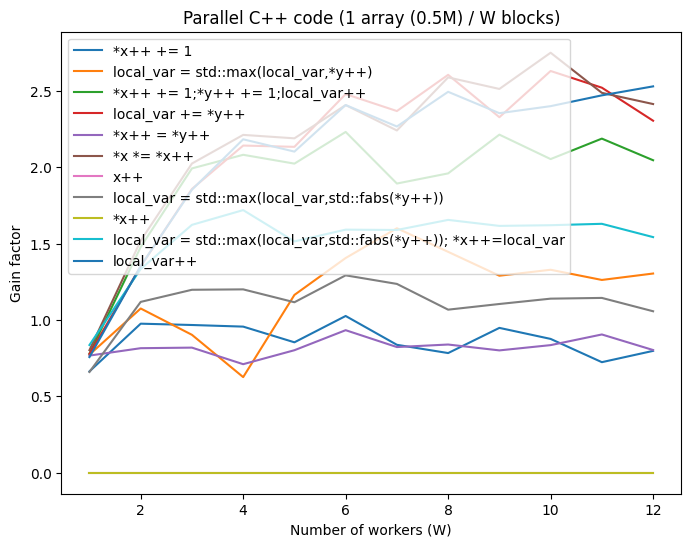

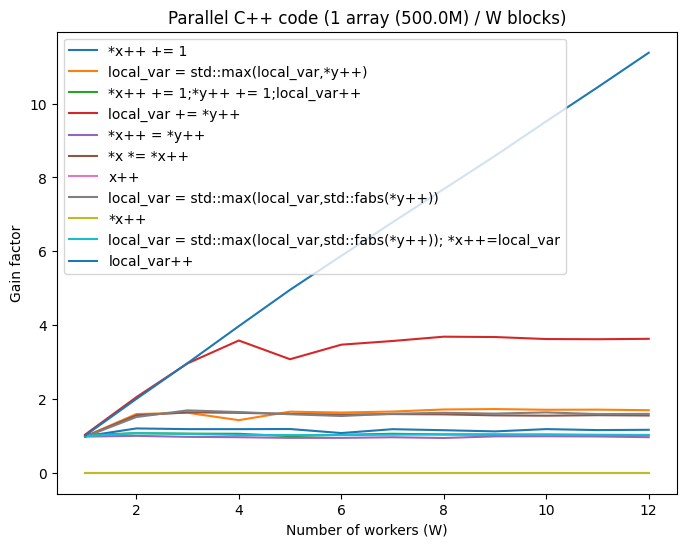

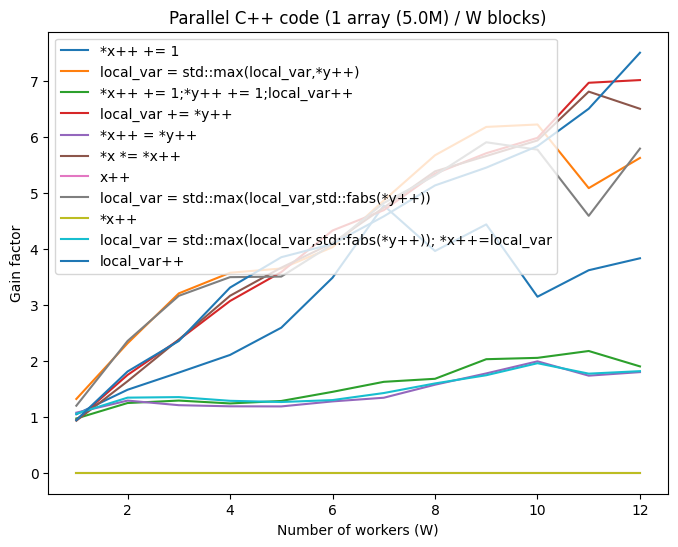

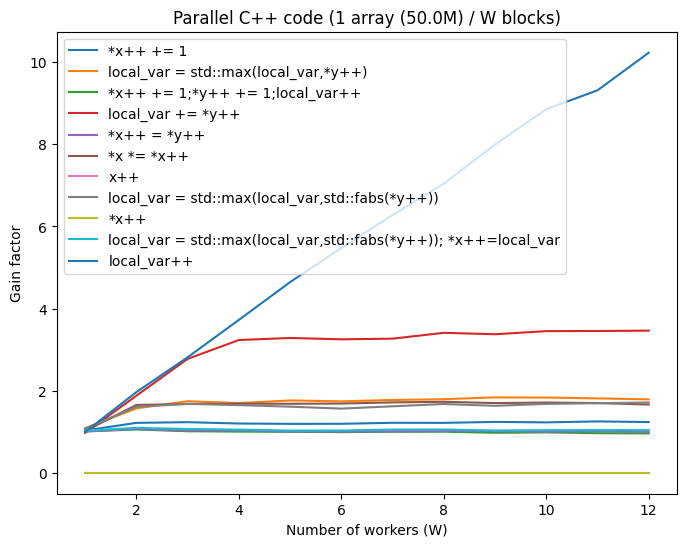

In [5]:
# plot w.r.t. data sizes
for n  in n_values:
	fig, ax1 = plt.subplots(figsize=(8,6))
	for fct in fct_values:
		x = [i for i in range(1, nb_max+1)]
		y = [means[fct][n][0]/(means[fct][n][i]+1e-10) for i in range(2,nb_max+2)]
		dev = [stds[fct][n][0]/(stds[fct][n][i]+1e-10) for i in range(2,nb_max+2)]
		# ax1.errorbar(x, y, yerr=dev, fmt='-o', label=fct)
		ax1.plot(x, y, label=fct)

	ax1.legend()
	plt.xlabel("Number of workers (W)")
	plt.ylabel("Gain factor")
	plt.title("Parallel C++ code (1 array ("+str(n/1e6)+"M) / W blocks)")

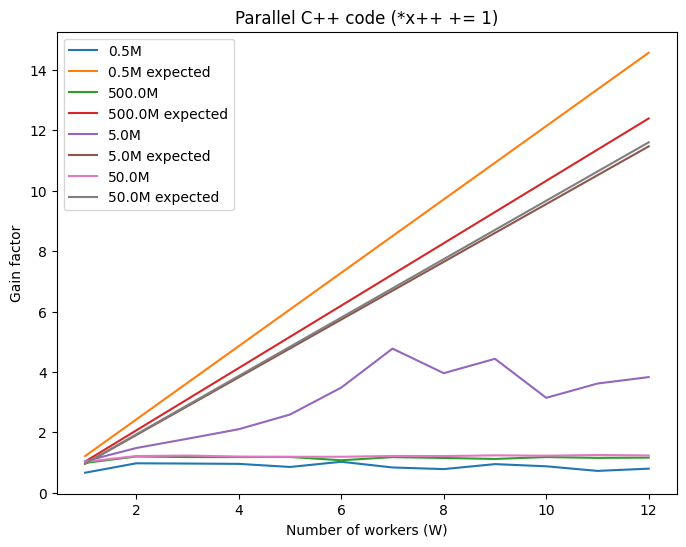

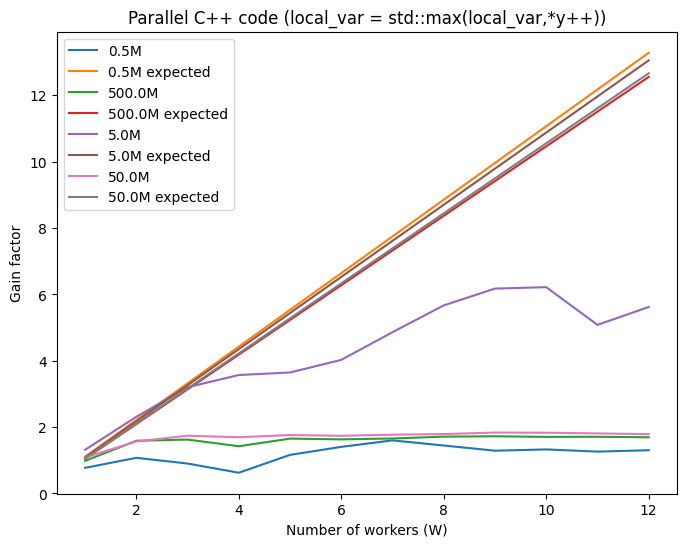

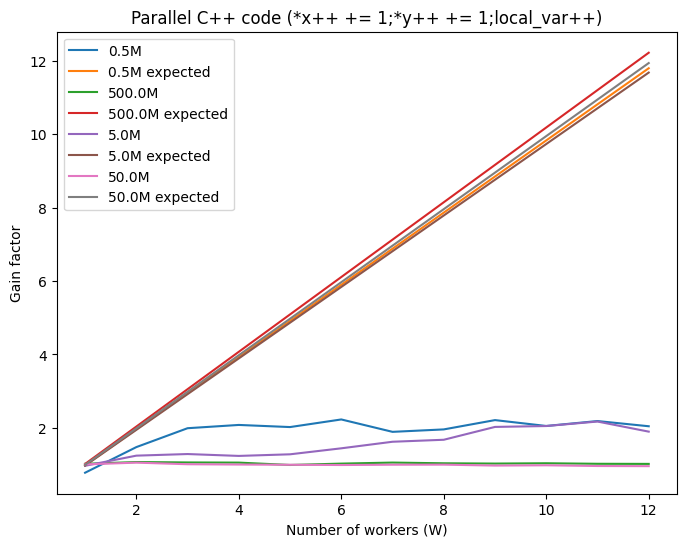

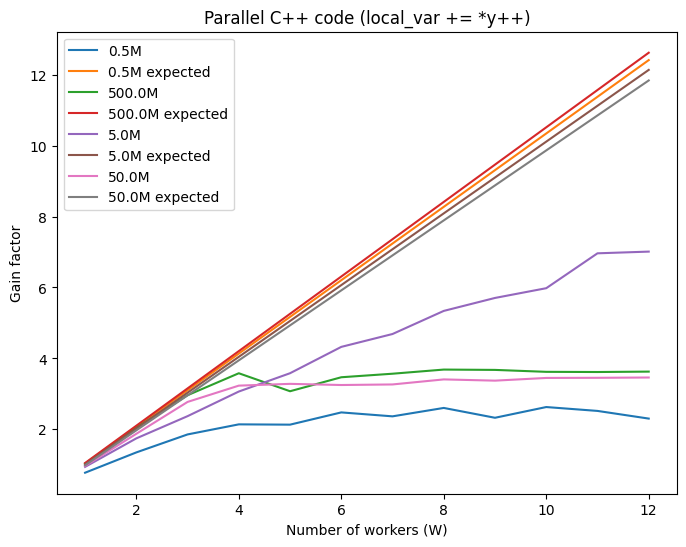

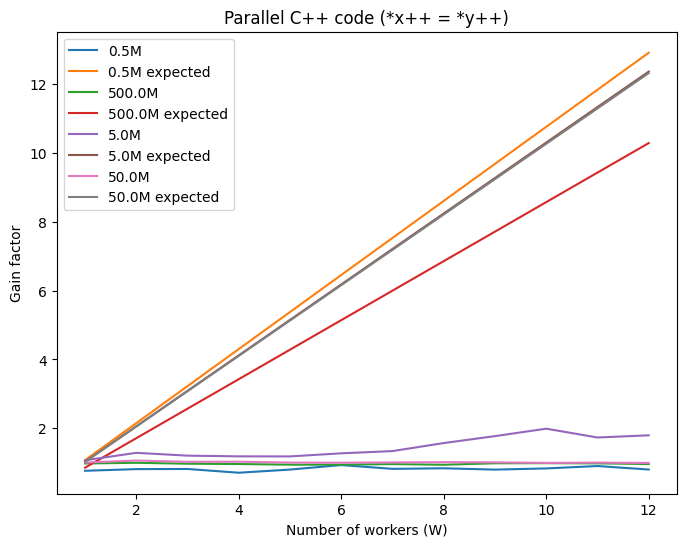

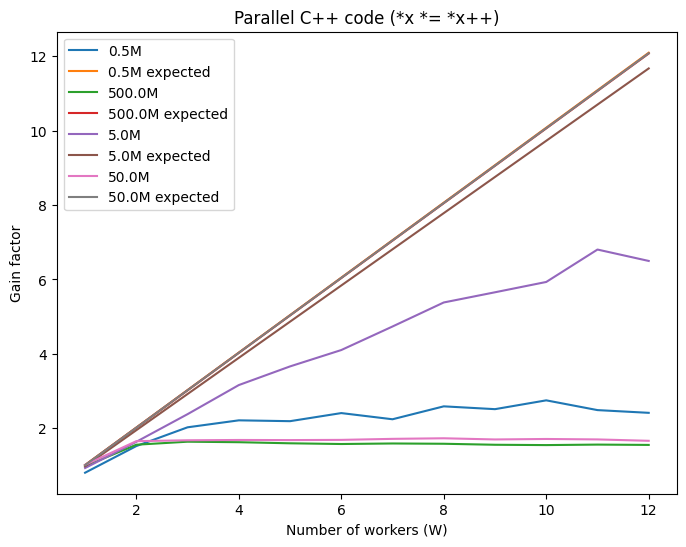

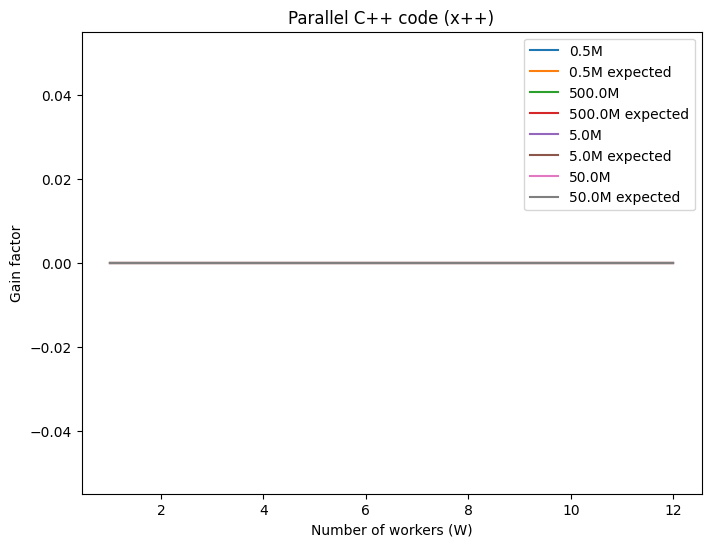

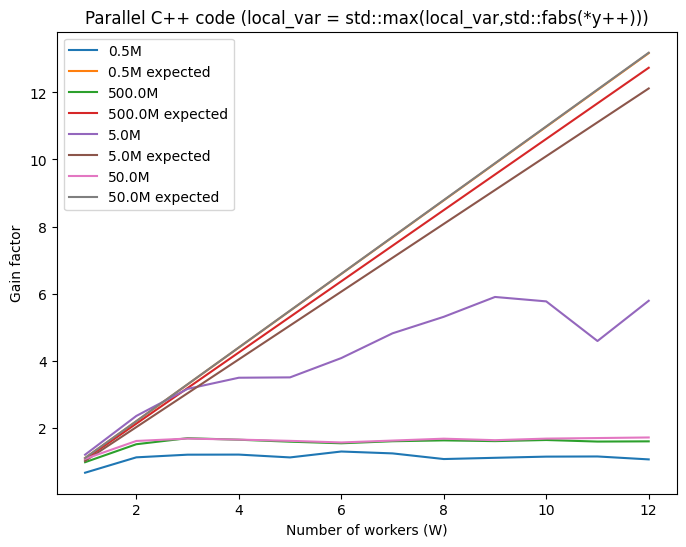

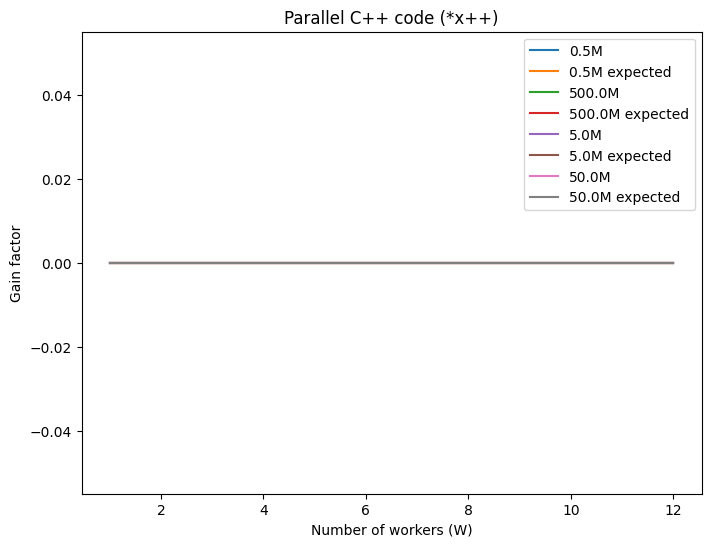

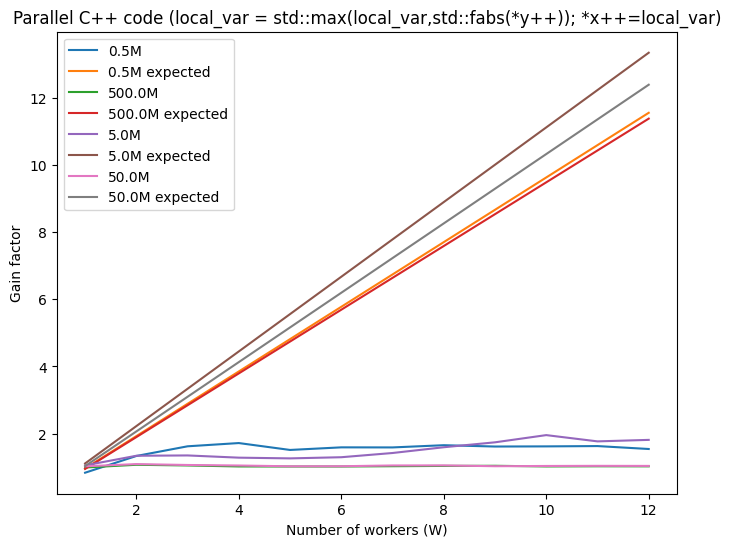

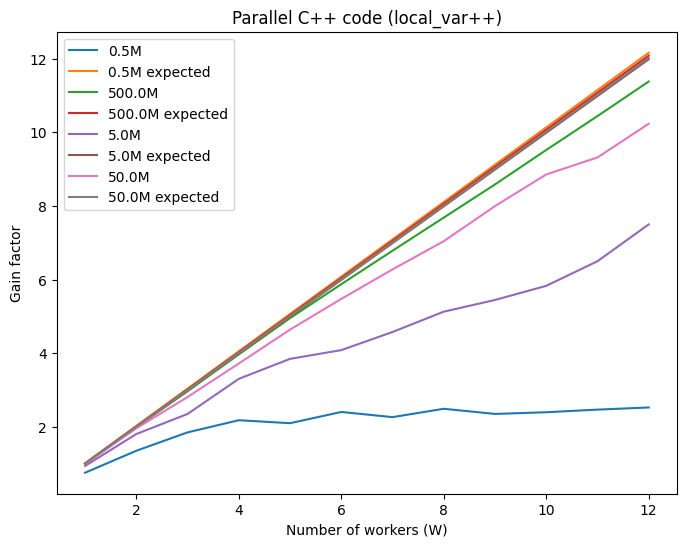

In [6]:
# plot w.r.t. fct
for fct in fct_values:
	fig, ax1 = plt.subplots(figsize=(8,6))
	for n  in n_values:
		x = [i for i in range(1, nb_max+1)]
		y = [means[fct][n][0]/(means[fct][n][i]+1e-10) for i in range(2,nb_max+2)]
		dev = [stds[fct][n][0]/(stds[fct][n][i]+1e-10) for i in range(2,nb_max+2)]
		# ax1.errorbar(x, y, yerr=dev, fmt='-o', label=fct)
		ax1.plot(x, y, label=str(n/1e6)+"M")
		best_coef = means[fct][n][0]/(means[fct][n][1]+1e-10)
		y = [best_coef/nb_max*i for i in range(1,nb_max+1)]
		ax1.plot(x, y, label=str(n/1e6)+"M expected")

	ax1.legend()
	plt.xlabel("Number of workers (W)")
	plt.ylabel("Gain factor")
	plt.title("Parallel C++ code ("+fct+")")

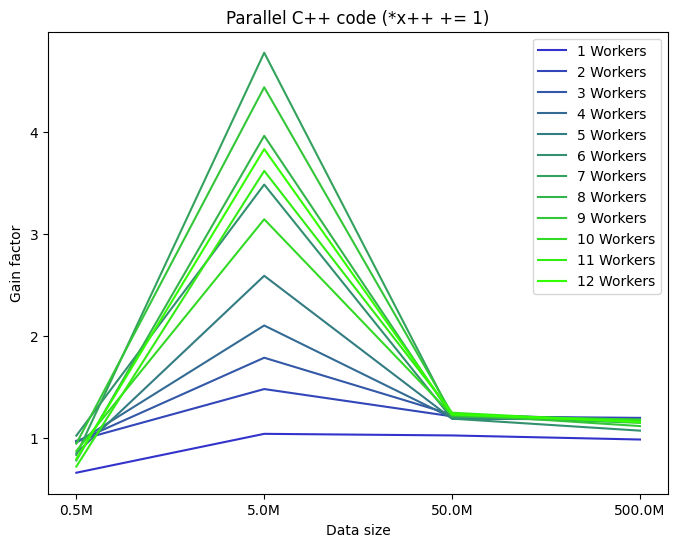

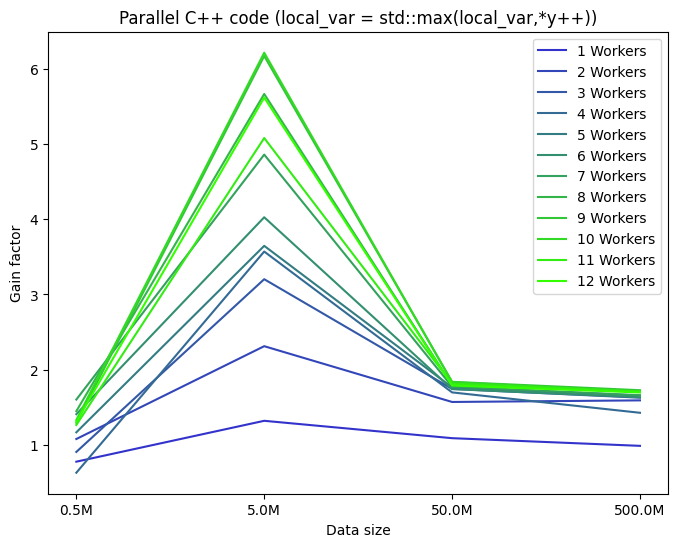

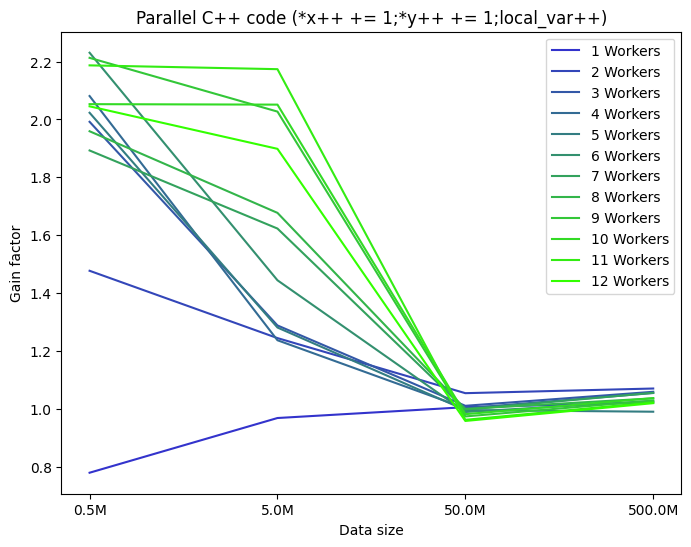

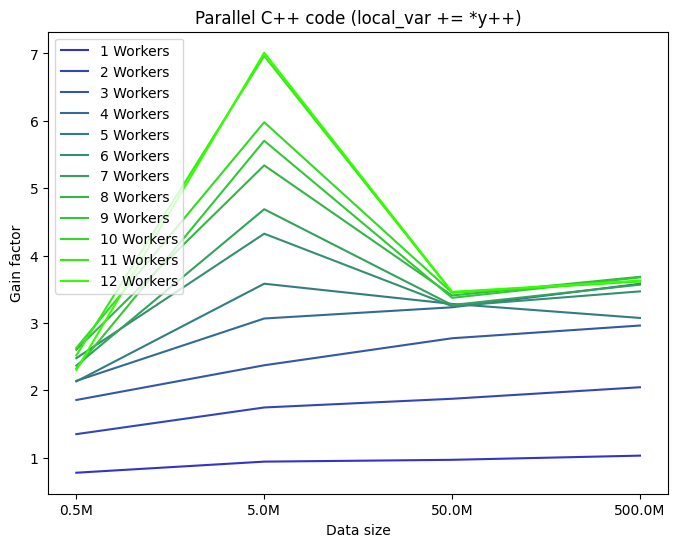

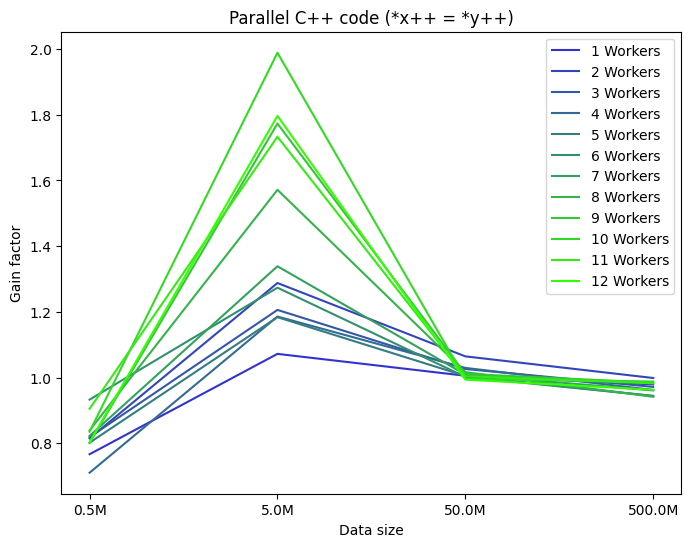

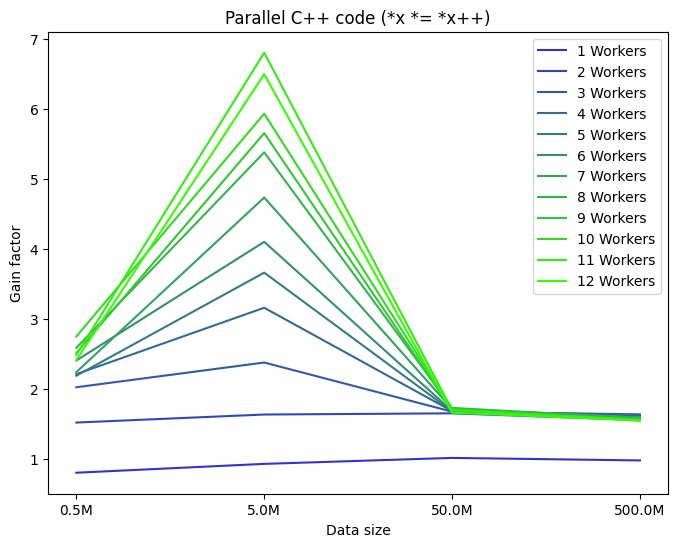

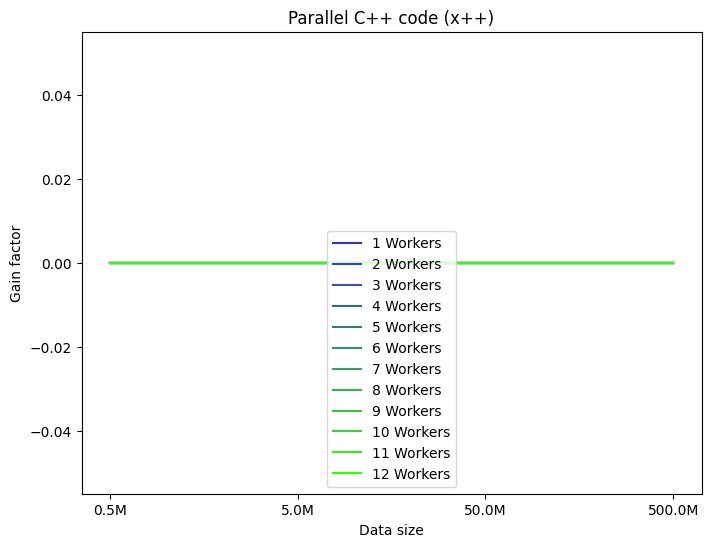

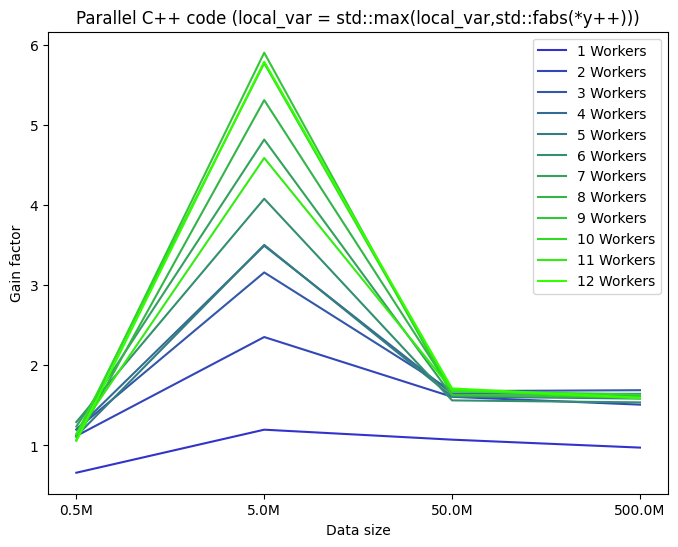

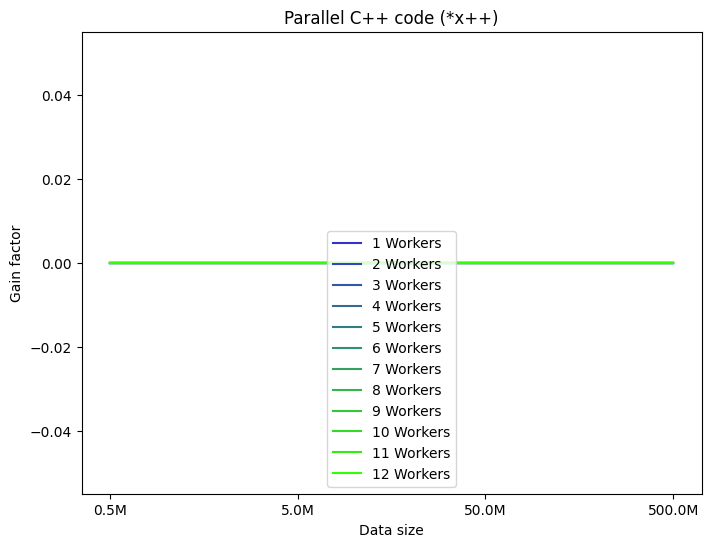

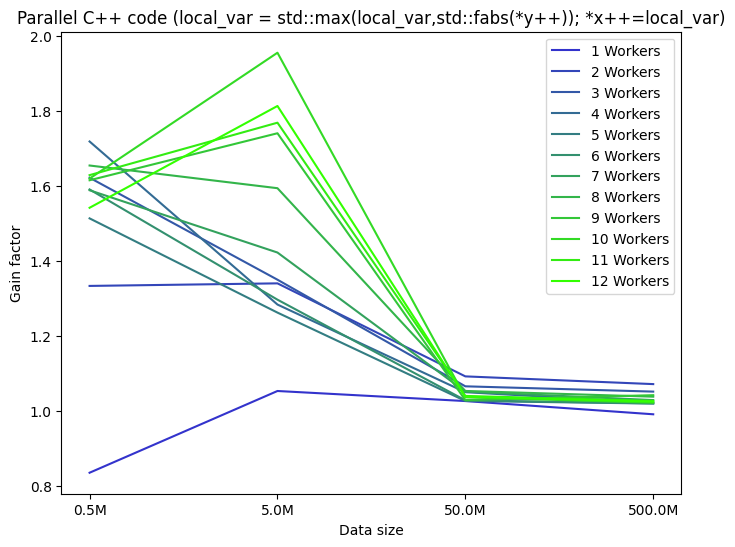

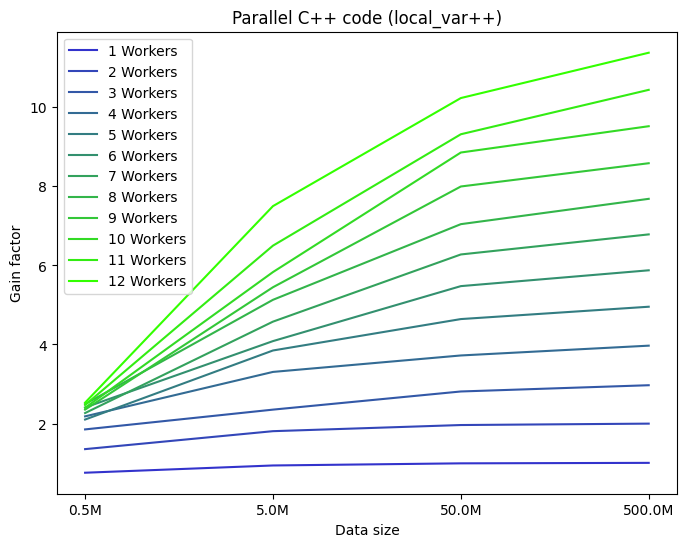

In [7]:
sorted_n_values = list(n_values)
sorted_n_values.sort()
for fct in fct_values:
    fig, ax1 = plt.subplots(figsize=(8,6))
    plt.title("Parallel C++ code ("+fct+")")
    plt.xlabel("Data size")
    plt.ylabel("Gain factor")
    colors = [(0.2, i, 1-i, 1) for i in np.linspace(0.2, 1, nb_max)]
    for worker in range(1, nb_max+1):
        x = [i for i in range(len(sorted_n_values))]
        y = [means[fct][n][0]/(means[fct][n][1+worker]+1e-10) for n in sorted_n_values]
        ax1.plot(x, y, color = colors[worker-1], label=str(worker)+" Workers")
    plt.xticks([i for i in range(len(sorted_n_values))], [str(n/1e6)+"M" for n in sorted_n_values])
    ax1.legend()
    